#### Step 1. Get Data

In [ ]:
!wget -O SpamEmailClassificationDataset.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true


--2024-08-18 19:49:04--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/main/SpamEmailClassificationDataset.zip [following]
--2024-08-18 19:49:04--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/main/SpamEmailClassificationDataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/main/SpamEmailClassificationDataset.zip [following]
--2024-08-18 19:49:04--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/main/SpamEmailClassificationDataset.zip
Resolving raw.githubusercontent.com (raw.github

#### Step 2. Unzip Data

In [ ]:
!unzip SpamEmailClassificationDataset.zip


Archive:  SpamEmailClassificationDataset.zip
replace SpamEmailClassificationDataset/combined_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SpamEmailClassificationDataset/combined_data.csv  


#### Step 3. Set the libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Завантажимо стоп-слова
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Step 4. Read, clean and reduce the dataframe



In [ ]:
df = pd.read_csv('SpamEmailClassificationDataset/combined_data.csv')
print(df['label'].value_counts())

label
1        7813
0        7047
label       1
Name: count, dtype: int64


In [ ]:
print(df.iloc[0])

label    label
text      text
Name: 0, dtype: object


In [ ]:
df = df[1:].reset_index(drop=True)
print(df.iloc[0])

label                                                    1
text     ounce feather bowl hummingbird opec moment ala...
Name: 0, dtype: object


In [ ]:
df_cutted = df.head(5000)
print(df_cutted['label'].value_counts())

label
1    2675
0    2325
Name: count, dtype: int64


In [ ]:
print(f"Overview {df_cutted.head}")


Overview <bound method NDFrame.head of      label                                               text
0        1  ounce feather bowl hummingbird opec moment ala...
1        1  wulvob get your medircations online qnb ikud v...
2        0   computer connection from cnn com wednesday es...
3        1  university degree obtain a prosperous future m...
4        0  thanks for all your answers guys i know i shou...
...    ...                                                ...
4995     1  good morning ,\nwe we offer latest oem package...
4996     0  the internet home of home news markets technol...
4997     1                                            lakjsdf
4998     1  liked it oh dear yes and sat smiling admiring ...
4999     0   the daily top escapenumber from cnn com top v...

[5000 rows x 2 columns]>


#### Step 5. Visualize the Histogram

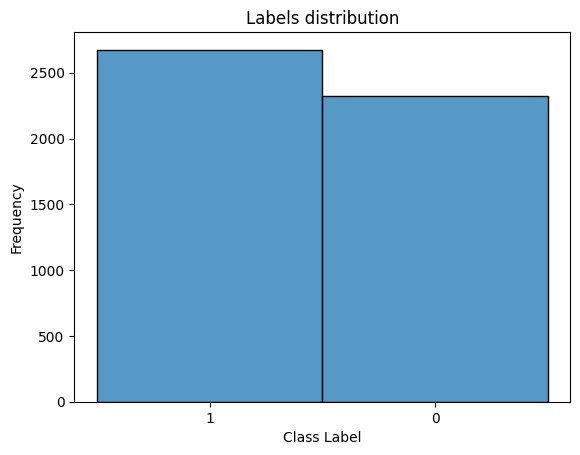

In [ ]:
sns.histplot(df_cutted['label'], kde=False)
plt.title('Labels distribution')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.show()

#### Step 6. Text transformation

In [ ]:
corpus = []
lemmatizer = WordNetLemmatizer()

for document in df_cutted["text"]:
    original_length = len(document)

    document = re.sub("[^a-zA-Z0-9@#]", " ", document).lower()
    after_regex_length = len(document)

    document = document.split()
    after_split_length = len(document)

    document = [lemmatizer.lemmatize(word) for word in document if word not in stop_words]
    after_lemmatization_length = len(document)

    document = list(set(document))
    after_deduplication_length = len(document)

    document = " ".join(document)
    corpus.append(document)

df_cutted.loc[:, "text"] = corpus


#### Step 7. prepare the train_spam and train_ham

In the context of our task, 'ham' refers to non-spam emails.
The test data for both spam and non-spam (ham) groups is a subset of the original dataset.

In [ ]:
# Split the data into spam and ham based on the 'label' column
train_spam = df_cutted[df_cutted['label'] == "1"]['text'].tolist()
train_ham = df_cutted[df_cutted['label'] == "0"]['text'].tolist()

# Split the data into training and testing sets
train_spam, test_spam = train_test_split(train_spam, test_size=0.2, random_state=42)
train_ham, test_ham = train_test_split(train_ham, test_size=0.2, random_state=42)

# Function to check the lengths of each list
def check_lengths():
    print(f"Length of training spam data: {len(train_spam)}")
    print(f"Length of testing spam data: {len(test_spam)}")
    print(f"Length of training ham (not spam) data: {len(train_ham)}")
    print(f"Length of testing ham (not spam) data: {len(test_ham)}")

# Call the function to check lengths
check_lengths()

Length of training spam data: 2140
Length of testing spam data: 535
Length of training ham (not spam) data: 1860
Length of testing ham (not spam) data: 465


#### Step 8. Define spamicity and hamicity

In [ ]:
# Count the words in spam messages
vocab_words_spam = [word for sentence in train_spam for word in sentence.split()]
vocab_unique_words_spam = list(set(vocab_words_spam))

# Count the words in ham messages
vocab_words_ham = [word for sentence in train_ham for word in sentence.split()]
vocab_unique_words_ham = list(set(vocab_words_ham))

# Calculate the spamicity and hamicity for each word
dict_spamicity = {}
dict_hamicity = {}

total_spam = len(train_spam)
total_ham = len(train_ham)

# Calculate spamicity for each unique word in spam
for w in vocab_unique_words_spam:
    emails_with_w = sum(1 for sentence in train_spam if w in sentence)
    spamicity = (emails_with_w + 1) / (total_spam + 2)  # with smoothing
    dict_spamicity[w.lower()] = spamicity

# Calculate hamicity for each unique word in ham
for w in vocab_unique_words_ham:
    emails_with_w = sum(1 for sentence in train_ham if w in sentence)
    hamicity = (emails_with_w + 1) / (total_ham + 2)  # with smoothing
    dict_hamicity[w.lower()] = hamicity

#### Step 9. Define the probabilities and clasify the data

In [ ]:
# Calculate the probability of spam and ham
prob_spam = len(train_spam) / (len(train_spam) + len(train_ham))
prob_ham = len(train_ham) / (len(train_spam) + len(train_ham))

# Function to multiply all word probabilities together
def mult(list_):
    total_prob = 1
    for i in list_:
        total_prob *= i
    return total_prob

# Function to calculate the probability based on Naive Bayes with binary interpretation
def Bayes(email, epsilon=1e-10):
    probs_s = []
    probs_h = []
    for word in email:
        pr_WS = dict_spamicity.get(word, 1/(total_spam + 2))  # Smoothing for unknown words
        pr_WH = dict_hamicity.get(word, 1/(total_ham + 2))    # Smoothing for unknown words

        probs_s.append(pr_WS)
        probs_h.append(pr_WH)

    # Calculate the spam and ham probability for the email
    prob_spam_email = prob_spam * mult(probs_s)
    prob_ham_email = prob_ham * mult(probs_h)

    # Final classification: classify as ham if ham probability is higher, else spam
    if prob_ham_email > prob_spam_email:
        return 0  # Ham
    else:
        return 1  # Spam

#### Step 10. Assess the result

Precision: 0.8922
Recall: 0.7271
F1 Score: 0.8012


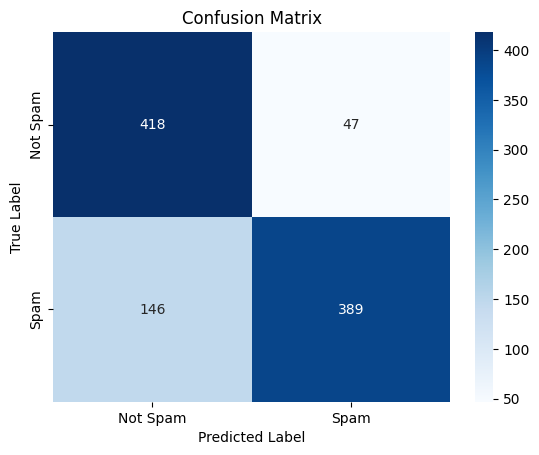

              precision    recall  f1-score   support

    Not Spam       0.74      0.90      0.81       465
        Spam       0.89      0.73      0.80       535

    accuracy                           0.81      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000



In [ ]:
# Lists to store the true labels and predicted labels
y_true = []
y_pred = []

# Predictions for spam emails
for email in test_spam:
    y_true.append(1)  # True label: spam
    y_pred.append(Bayes(email.split()))  # Predicted label

# Predictions for ham emails
for email in test_ham:
    y_true.append(0)  # True label: not spam (ham)
    y_pred.append(Bayes(email.split()))  # Predicted label

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print a full classification report
print(classification_report(y_true, y_pred, target_names=['Not Spam', 'Spam']))


### Summary

The model performs reasonably well overall with an accuracy of 81%. However, there is a trade-off between precision and recall, particularly for the "Spam" class. The model tends to miss some spam emails (false negatives), which could lead to spam slipping through to the user's inbox. If the goal is to minimize spam reaching users, further tuning or a different model may be necessary to improve recall for the "Spam" class without sacrificing too much precision.